In [30]:
import numpy as np
import matplotlib.pyplot as plt
import gym

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.distributions import Categorical

import random
from collections import deque

In [31]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [32]:
class policy_estimator(nn.Module):
    def __init__(self, s_size=4, h_size=16, a_size=2):
        super(policy_estimator, self).__init__()
        self.affine1 = nn.Linear(8, 16)
        self.dropout = nn.Dropout(p=0.6)
        self.affine2 = nn.Linear(16, 4)

    def forward(self, x):
        x = self.affine1(x)
        #x = self.dropout(x)
        x = F.relu(x)
        action_scores = self.affine2(x)
        return F.softmax(action_scores, dim=1)

#env = gym.make('CartPole-v0')
env=gym.make('LunarLander-v2')
policy = policy_estimator()

In [33]:
def compute_returns(rewards, gamma):
    rewards_rev = np.array([gamma**i * rewards[i] 
                  for i in range(len(rewards))])
    rewards_rev = rewards_rev.cumsum()[::-1]
    
    #rewards_rev=(rewards_rev-np.mean(rewards_rev))/np.std(rewards_rev)
    return rewards_rev

In [34]:
def reinforce(env, policy_estimator, num_episodes=200,
              batch_size=100, gamma=0.9):

    seed=42
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    np.random.seed(seed)
    random.seed(seed)
    env.seed(seed)
    
    optimizer = torch.optim.Adam(policy_estimator.parameters(), 
                           lr=1e-2)
    
    total_rewards=[]
    
    for ep in range(num_episodes):
        rewards=[]
        current_state=env.reset()    
        log_probs=[]          
        done = False
        
        for i in range(batch_size):    
            
            action_probs = policy_estimator( torch.from_numpy(current_state).float().unsqueeze(0))
            m = torch.distributions.Categorical(action_probs)
            action = m.sample()
            test=m.log_prob(action)           
            log_probs.append(test) 
            
            next_state, reward, done,info = env.step(action.item())       
            rewards.append(reward)
            current_state = next_state
            
            if done==True:
                break
                
        total_rewards.append(np.sum(rewards))       
        returns = compute_returns(rewards, gamma)
        
        loss=[]
        for log_prob_, re in zip(log_probs, returns):
            loss.append(-log_prob_ * re)
            
        optimizer.zero_grad()    
        loss = np.sum(loss)
        loss.backward()
        optimizer.step()
        
        if ep%100==0:
            print(ep)

    return total_rewards

0
100


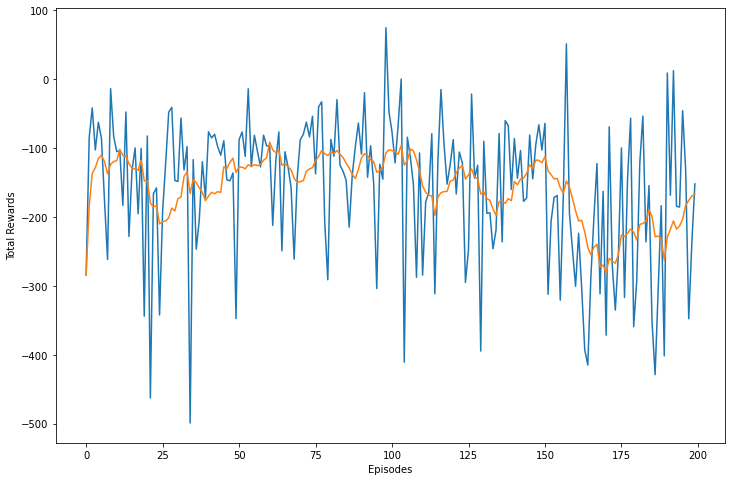

In [35]:
rewards = reinforce(env, policy )
env.close()
window = 10
smoothed_rewards = [np.mean(rewards[i-window:i+1]) if i > window 
                    else np.mean(rewards[:i+1]) for i in range(len(rewards))]

plt.figure(figsize=(12,8))
plt.plot(rewards)
plt.plot(smoothed_rewards)
plt.ylabel('Total Rewards')
plt.xlabel('Episodes')
plt.show()

In [36]:
# env = gym.make('CartPole-v0')
#policy = policy_estimator()

optimizer = torch.optim.Adam(policy .parameters(), 
                           lr=1e-2)

s=env.reset()
action_probs = policy_estimator( torch.from_numpy(s).float().unsqueeze(0))

print(action_probs)
# m = torch.distributions.Categorical(action_probs)
# # action = m.sample()
# # test=m.log_prob(action)


policy_estimator(
  (affine1): Linear(in_features=8, out_features=16, bias=True)
  (dropout): Dropout(p=0.6, inplace=False)
  (affine2): Linear(in_features=16, out_features=4, bias=True)
)


In [37]:

def test(env, policy_estimator, num_episodes=150,
              batch_size=10, gamma=1):

    seed=42
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    np.random.seed(seed)
    random.seed(seed)
    env.seed(seed)
    
    optimizer = torch.optim.Adam(policy_estimator.parameters(), 
                           lr=1e-2)  
    render=True
    for j in range(10):
        current_state=env.reset() 
        rewards=[]
        for i in range(100): 
            if render:
                env.render()
            action_probs = policy_estimator( torch.from_numpy(current_state).float().unsqueeze(0))
            m = torch.distributions.Categorical(action_probs)
            action = m.sample()
            test=m.log_prob(action)            

            next_state, reward, done,info = env.step(action.item()) 
            rewards.append(reward)
            current_state = next_state

            if done:
                break
    env.close()
    return 

test(env, policy, num_episodes=150,
              batch_size=10, gamma=1)

In [29]:
env.close()